<a href="https://colab.research.google.com/github/aishwarya2851-raj/VAC-COURSE/blob/main/creditcard02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


In [ ]:

def predict_fraud(input_list):
    scaled = scaler.transform([input_list])
    pred = model.predict(scaled)[0]
    return "FRAUD" if pred == 1 else "NOT FRAUD"
    print("\nEnter transaction details to predict:")

In [ ]:

sample = []

for col in X.columns:
    value = float(input(f"Enter value for {col}: "))
    sample.append(value)

result = predict_fraud(sample)
print("\nPrediction:", result)

Enter value for Time: 0.5
Enter value for V1: 8.6
Enter value for V2: 7.8
Enter value for V3: 5.6
Enter value for V4: 5.4
Enter value for V5: 3.4
Enter value for V6: 8.8
Enter value for V7: 2.3
Enter value for V8: 4.5
Enter value for V9: 6.7
Enter value for V10: 8.1
Enter value for V11: 5.6
Enter value for V12: 8.5
Enter value for V13: 6.8
Enter value for V14: 34.5
Enter value for V15: 67.8
Enter value for V16: 8.9
Enter value for V17: 3.45
Enter value for V18: 6.7
Enter value for V19: 4.5
Enter value for V20: 67.8
Enter value for V21: 56.7
Enter value for V22: 89.76
Enter value for V23: 4.3
Enter value for V24: 5.6
Enter value for V25: 7.5
Enter value for V26: 8.7
Enter value for V27: 4.5
Enter value for V28: 7.8
Enter value for Amount: 456

Prediction: NOT FRAUD


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from google.colab import files

# ---- UPLOAD & READ DATA ----
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())



Saving credit_card_fraud_dataset.csv to credit_card_fraud_dataset (3).csv
   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  


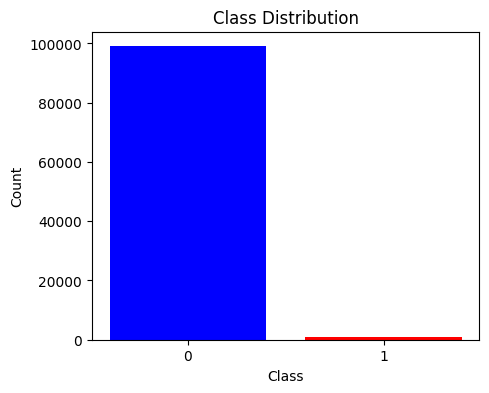

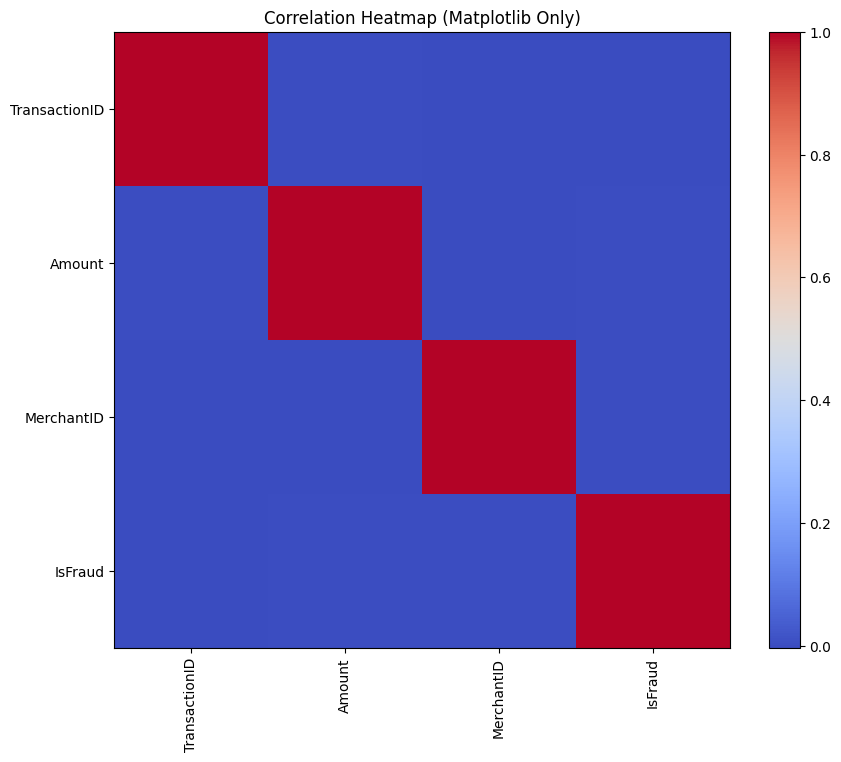

Model Trained Successfully!

Enter transaction details to predict:


In [ ]:
# ---- MATPLOTLIB ONLY VISUALIZATIONS ----

# 1. Class distribution
plt.figure(figsize=(5,4))
class_counts = df["IsFraud"].value_counts()
plt.bar(class_counts.index, class_counts.values, color=["blue", "red"])
plt.xticks(class_counts.index)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 2. Correlation heatmap (manual using matplotlib)
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Matplotlib Only)")
plt.show()

# ---- TRAIN / TEST PREPARATION ----
# Drop non-numeric columns before scaling
X = df.drop(["IsFraud", "TransactionDate", "TransactionType", "Location"], axis=1)
y = df["IsFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- MODEL ----
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Model Trained Successfully!")

# ---- PREDICTION FUNCTION ----
def predict_fraud(input_list):
    # Ensure the input list has the same number of features as X_train
    if len(input_list) != X.shape[1]:
        raise ValueError(f"Expected {X.shape[1]} features, but got {len(input_list)}")
    scaled = scaler.transform([input_list])
    pred = model.predict(scaled)[0]
    return "FRAUD" if pred == 1 else "NOT FRAUD"

# ---- USER INPUT ----
print("\nEnter transaction details to predict:")
sample = []

# Filter for numeric columns for input, as not all columns might be used as features
numeric_cols_for_prediction = [col for col in X.columns if pd.api.types.is_numeric_dtype(df[col]) and col != "TransactionDate" and col != "TransactionType" and col != "Location"]

for col in numeric_cols_for_prediction:
    value = float(input(f"Enter value for {col}: "))
    sample.append(value)

result = predict_fraud(sample)
print("\nPrediction:", result)